# Data exploration

Explore the maps saved in Data

In [32]:
from tqdm import tqdm
from PIL import Image, ImageOps, ImageFilter
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DATA_PATH = Path(r"/media/leo/Data/Data/1")

In [3]:
# Files stats

In [4]:
DATA_PATH.glob("*.jpg")

<generator object Path.glob at 0x7f7d7764e580>

In [5]:
files = [f for f in DATA_PATH.glob("*.jpg")]
print(f"Number of images {len(files)}")

Number of images 32766


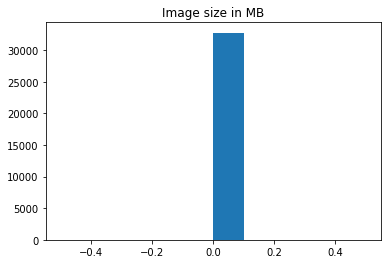

In [6]:
sizes_MB = [int(f.stat().st_size / 1000000) for f in files] # Size in MB for f in files] 
plt.hist(sizes_MB)
plt.title("Image size in MB")
plt.show()

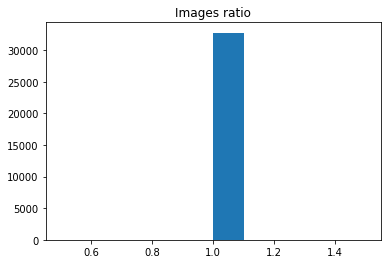

In [7]:
sizes_ratio = [ (Image.open(f).size[0] / Image.open(f).size[1]) for f in files] # Size in MB for f in files] 
plt.hist(sizes_ratio)
plt.title("Images ratio")
plt.show()

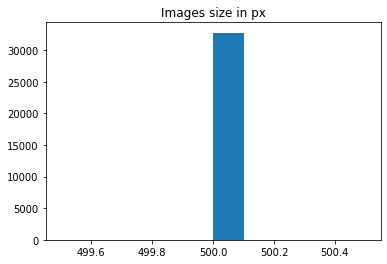

In [8]:
sizes_ratio = [ (Image.open(f).size[0]) for f in files] # Size in MB for f in files] 
plt.hist(sizes_ratio)
plt.title("Images size in px")
plt.show()

In [20]:
files[58]

PosixPath('/media/leo/Data/Data/1/58.jpg')

In [6]:
import cv2
import numpy as np

test_keep = cv2.imread(str(r"/media/leo/Data/Data/1/110.jpg"))
test_del = cv2.imread(str(r"/media/leo/Data/Data/1/76.jpg"))

def imgCannyErode(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im2 = cv2.Canny(im, 80, 150)
    kernel = np.ones((5, 5), np.uint8)
    im3 = cv2.dilate(im2, kernel, iterations=1)
    im3 = cv2.erode(im3, kernel, iterations=3)

    display = cv2.hconcat([im, im2, im3])
    return display
    


def pretretment(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = cv2.Canny(im, 80, 150)
    kernel = np.ones((5, 5), np.uint8)
    im = cv2.dilate(im, kernel, iterations=1)
    im = cv2.erode(im, kernel, iterations=3)
    return im
    
list_data = [test_keep, test_del]
#for img_name in list_data:
for i in list_data:
    
    display = pretretment(i) 
    if display.max()==0:
        continue
    print("None")
    cv2.imshow('Keep and del',i)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


None


In [9]:
display.crop()

AttributeError: 'numpy.ndarray' object has no attribute 'crop'

11.591491763599025 208.931804


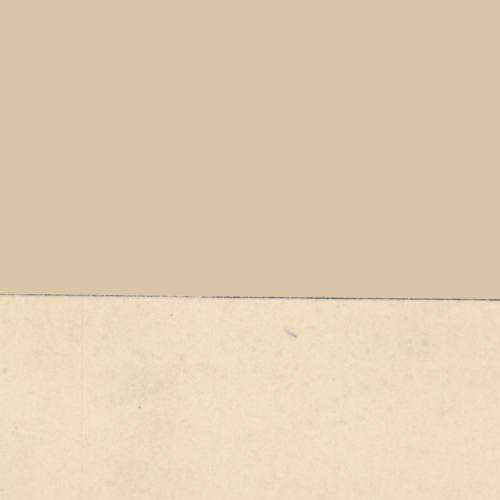

In [22]:
im = Image.open(files[34])
print( np.std(ImageOps.grayscale(im)), np.mean(ImageOps.grayscale(im)))
im

In [15]:
width, height = im.size
print(width, height)
results = []
for w in range(0, width, 500):
    for h in range(0, height, 500):
        a = im.crop((w, h, w + 500, h+500))
        if np.std(ImageOps.grayscale(a)) > 1.0:
            results.append(a)
        

500 500


0 4.063196777614395 201.532372


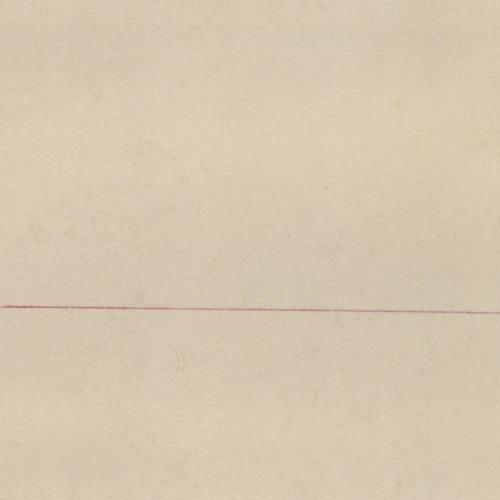

In [16]:
for i,a in enumerate(results[:]):
    print(i, np.std(ImageOps.grayscale(a)), np.mean(ImageOps.grayscale(a)))
a
## Empty std 0 mean 193

In [13]:
results[58]

IndexError: list index out of range